In [1]:
import pandas as pd
import numpy as np


In [9]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving partpdf_1758712161434_netflix_titles.xlsx to partpdf_1758712161434_netflix_titles.xlsx
User uploaded file "partpdf_1758712161434_netflix_titles.xlsx" with length 2394444 bytes


Once the file is uploaded, you can modify the code to read it from the Colab environment:

In [10]:
# Replace 'your_uploaded_filename.xlsx' with the actual name of the file you uploaded
file_path = "/content/partpdf_1758712161434_netflix_titles.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None)

In [13]:
df_titles = sheets['netflix_titles']
df_cast = sheets['netflix_titles_directors']
df_crew = sheets['netflix_titles_countries']
df_genres = sheets['netflix_titles_cast']
df_ratings = sheets['netflix_titles_category']

In [14]:
df_master = df_titles
df_master = df_master.merge(df_cast, on='show_id', how='left')
df_master = df_master.merge(df_crew, on='show_id', how='left')
df_master = df_master.merge(df_genres, on='show_id', how='left')
df_master = df_master.merge(df_ratings, on='show_id', how='left')


In [15]:
df_master.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Children & Family Movies
1,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Comedies
2,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Children & Family Movies
3,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Comedies
4,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,Children & Family Movies


Analytical Question Answer : When merging netflix_titles file with other sheets like netflix_titles_cast,netflix_titles_directions etc. we use left join.
Here left join is the most appropriate choice because it guarantees that all titles in the official Netflix catalog are retained, while enriching each title with whatever additional information is available from the other datasets.

In [16]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139946 entries, 0 to 139945
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_minutes  98561 non-null   object 
 1   duration_seasons  41387 non-null   object 
 2   type              139945 non-null  object 
 3   title             139945 non-null  object 
 4   date_added        139785 non-null  object 
 5   release_year      139944 non-null  float64
 6   rating            139870 non-null  object 
 7   description       139943 non-null  object 
 8   show_id           139942 non-null  float64
 9   director          101031 non-null  object 
 10  country           134152 non-null  object 
 11  cast              138456 non-null  object 
 12  listed_in         139942 non-null  object 
dtypes: float64(2), object(11)
memory usage: 13.9+ MB


In [18]:
df_master.isnull().sum()

,0
duration_minutes,41385
duration_seasons,98559
type,1
title,1
date_added,162
release_year,2
rating,76
description,3
show_id,4
director,38915


In [19]:
df_master['date_added'] = pd.to_datetime(df_master['date_added'], errors='coerce')

In [20]:
df_master['director'] = df_master['director'].fillna('Unknown')
df_master['country'] = df_master['country'].fillna('Unknown')


In [21]:
df_master['year_added'] = df_master['date_added'].dt.year

In [22]:
print(df_master[['date_added', 'year_added', 'director', 'country']].head())

  date_added  year_added      director        country
0 2019-09-09      2019.0  Richard Finn  United States
1 2019-09-09      2019.0  Richard Finn  United States
2 2019-09-09      2019.0  Richard Finn  United States
3 2019-09-09      2019.0  Richard Finn  United States
4 2019-09-09      2019.0  Richard Finn  United States


Analytical Question Answer : In the combined dataset, missing values in the country column were filled with the placeholder Unknown rather than dropping those rows or attempting imputation.
Filling missing country values with Unknown retains the most information and allows for robust and transparent analysis.

In [23]:
df_master['listed_in'] = df_master['listed_in'].str.split(',')

In [24]:
df_master['listed_in'] = df_master['listed_in'].apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else x)

In [25]:
df_exploded = df_master.explode('listed_in')


In [26]:
print(df_exploded[['show_id', 'title', 'listed_in']].head())

      show_id                                    title  \
0  81145628.0  Norm of the North: King Sized Adventure   
1  81145628.0  Norm of the North: King Sized Adventure   
2  81145628.0  Norm of the North: King Sized Adventure   
3  81145628.0  Norm of the North: King Sized Adventure   
4  81145628.0  Norm of the North: King Sized Adventure   

                  listed_in  
0  Children & Family Movies  
1                  Comedies  
2  Children & Family Movies  
3                  Comedies  
4  Children & Family Movies  


Analytical Question Answer : Bussiness advantage of transforming the data this way-By transforming the listed_in (category) column so that each category for a show gets its own row, we unlock significant analytical capabilities that were not feasible with the original comma-separated format.
Exploding the category column provides a normalized structure that supports more flexible, precise, and actionable business insights.

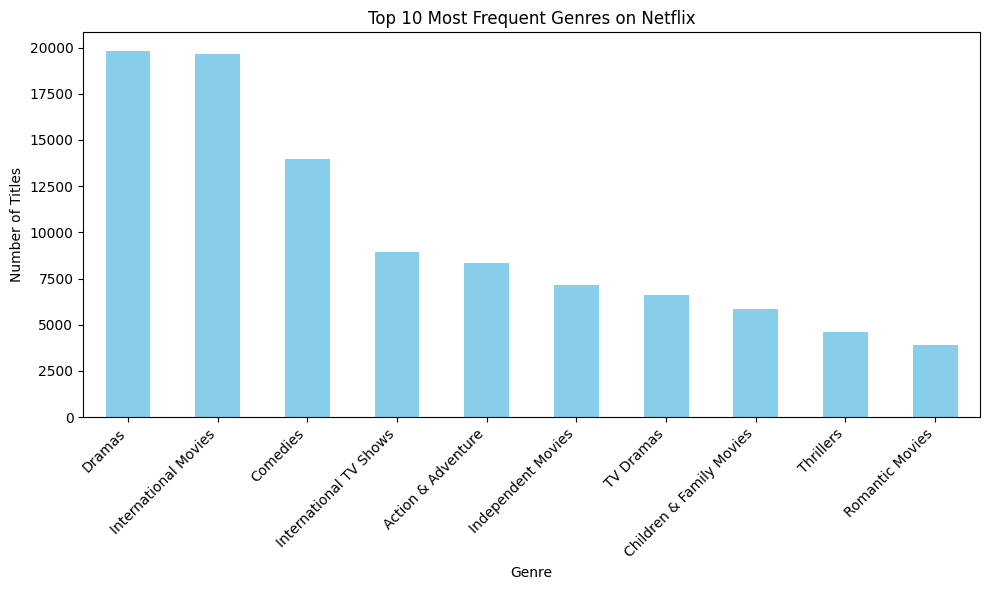

In [27]:
import matplotlib.pyplot as plt
top_genres = df_exploded['listed_in'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analytical Question Answer : The bar chart reveals that the 'Dramas' genre has the highest number of titles on Netflix, surpassing all other categories. This indicates that Netflix places a strong emphasis on drama content, likely because dramas appeal to a broad audience and drive significant viewer engagement across diverse markets.

In [29]:
df_master.to_csv('netflix_cleaned.csv', index=False)